# Load Dataset from Kaggle

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 598M/612M [00:03<00:00, 116MB/s] 
100% 612M/612M [00:03<00:00, 182MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
ls

gtsrb-german-traffic-sign.zip  meta/  Meta.csv      test/  Test.csv  Train/
kaggle.json                    Meta/  sample_data/  Test/  train/    Train.csv


<h1 style='color:brown' align="left">Traffic Sign Recognition Using CNN</h1>

<h2 style='color:red' align="left">Objectives</h2>

- To develop a Convolutional Neural Network (CNN)-based model capable of recognizing traffic signs from images.
- To preprocess and train on a custom dataset of traffic signs to achieve high classification accuracy.
- To enhance road safety by enabling real-time recognition of traffic signs using deep learning techniques.

<h2 style='color:red' align="left">Problem Statement</h2>
Traffic sign recognition is a critical component of autonomous vehicles and driver assistance systems. The aim of this project is to build an accurate image classification model using deep learning that can identify various types of traffic signs from images. The model is trained using Convolutional Neural Networks (CNNs) implemented in TensorFlow and Keras, utilizing a labeled dataset of traffic sign images. The challenge lies in achieving high precision and recall under varying image conditions such as brightness, orientation, and background noise.

<h2 style='color:red' align="left">Author</h2>

**Muhammad Sohaib**  

BS-Artificial Intelligence Student  

GitHub: [mdsohaib15](https://github.com/mdsohaib15)


# Importing Libraries

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, BatchNormalization,
                                     Dropout, GlobalAveragePooling2D, Dense)
from tensorflow.keras.initializers import HeNormal
import matplotlib.pyplot as plt
import numpy as np

# Load datasets using Keras

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Train",
    labels="inferred",
    label_mode="categorical",  # for one-hot encoded labels
    image_size=(30, 30),
    batch_size=32,
    validation_split=0.2,
    subset="training",
    seed=42
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Train",
    labels="inferred",
    label_mode="categorical",
    image_size=(30, 30),
    batch_size=32,
    validation_split=0.2,
    subset="validation",
    seed=42
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


#  Normalize the image data:

In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Build the CNN model

In [8]:
input_shape = (64, 64, 3)
num_classes = 43

model = Sequential()

# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeNormal(), input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Classification Head
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 185,803 (725.79 KB)

 Trainable params: 184,651 (721.29 KB)

 Non-trainable params: 1,152 (4.50 KB)

# Train the model

In [10]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 136s 132ms/step - accuracy: 0.2872 - loss: 2.9617 - val_accuracy: 0.8973 - val_loss: 0.3531
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 130s 133ms/step - accuracy: 0.8370 - loss: 0.5298 - val_accuracy: 0.9788 - val_loss: 0.0764
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 140s 131ms/step - accuracy: 0.9317 - loss: 0.2223 - val_accuracy: 0.9916 - val_loss: 0.0367
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 131s 134ms/step - accuracy: 0.9598 - loss: 0.1350 - val_accuracy: 0.9930 - val_loss: 0.0262
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 141s 133ms/step - accuracy: 0.9687 - loss: 0.1005 - val_accuracy: 0.9954 - val_loss: 0.0178
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 130s 133ms/step - accuracy: 0.9746 - loss: 0.0830 - val_accuracy: 0.9948 - val_loss: 0.0191
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 139s 130ms/step - accuracy: 0.9773 - loss: 0.0755 - val_accuracy: 0.9955 - val_loss: 0.0172
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 145s 132ms/step - accuracy: 0.9809 -

# Access accuracy and loss

In [11]:
train_accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Print final values

In [12]:
print("Final Training Accuracy:", round(train_accuracy[-1], 4))
print("Final Validation Accuracy:", round(val_accuracy[-1], 4))
print("Final Training Loss:", round(train_loss[-1], 4))
print("Final Validation Loss:", round(val_loss[-1], 4))

Final Training Accuracy: 0.9893
Final Validation Accuracy: 0.998
Final Training Loss: 0.0333
Final Validation Loss: 0.009


# Plot accuracy and loss

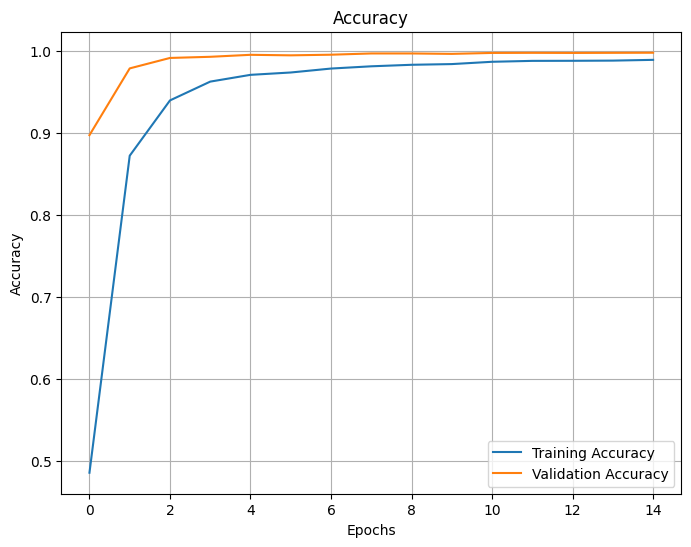

In [13]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_accuracy(history)

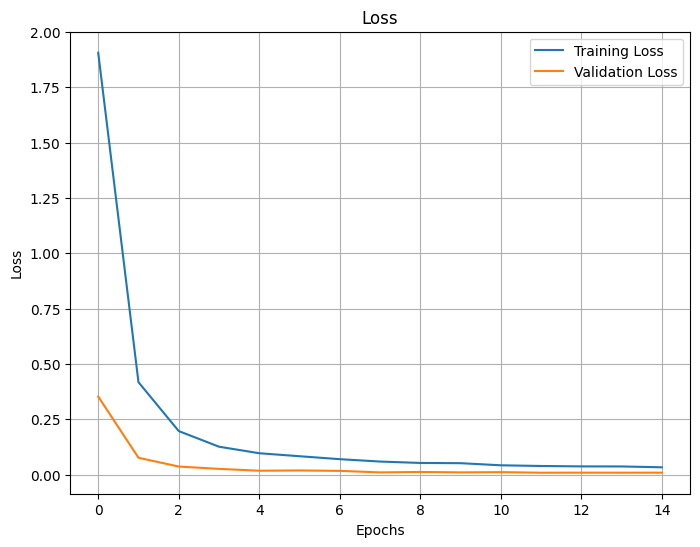

In [14]:
def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_loss(history)

# Save the model

In [19]:
model.save("traffic_classifier_model.h5")

### Data set link
https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign